In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
dataset = pd.read_csv('diabetes.csv')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(768, 9)

#Dataset info


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Count Null Values**

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization


<Axes: xlabel='Outcome', ylabel='count'>

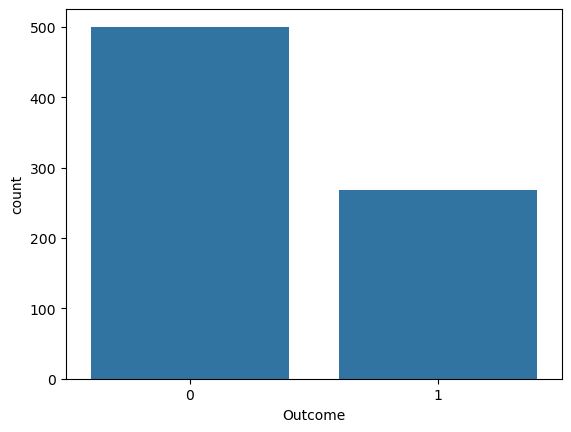

In [9]:
sns.countplot(x= 'Outcome', data=dataset)

# Histogram View

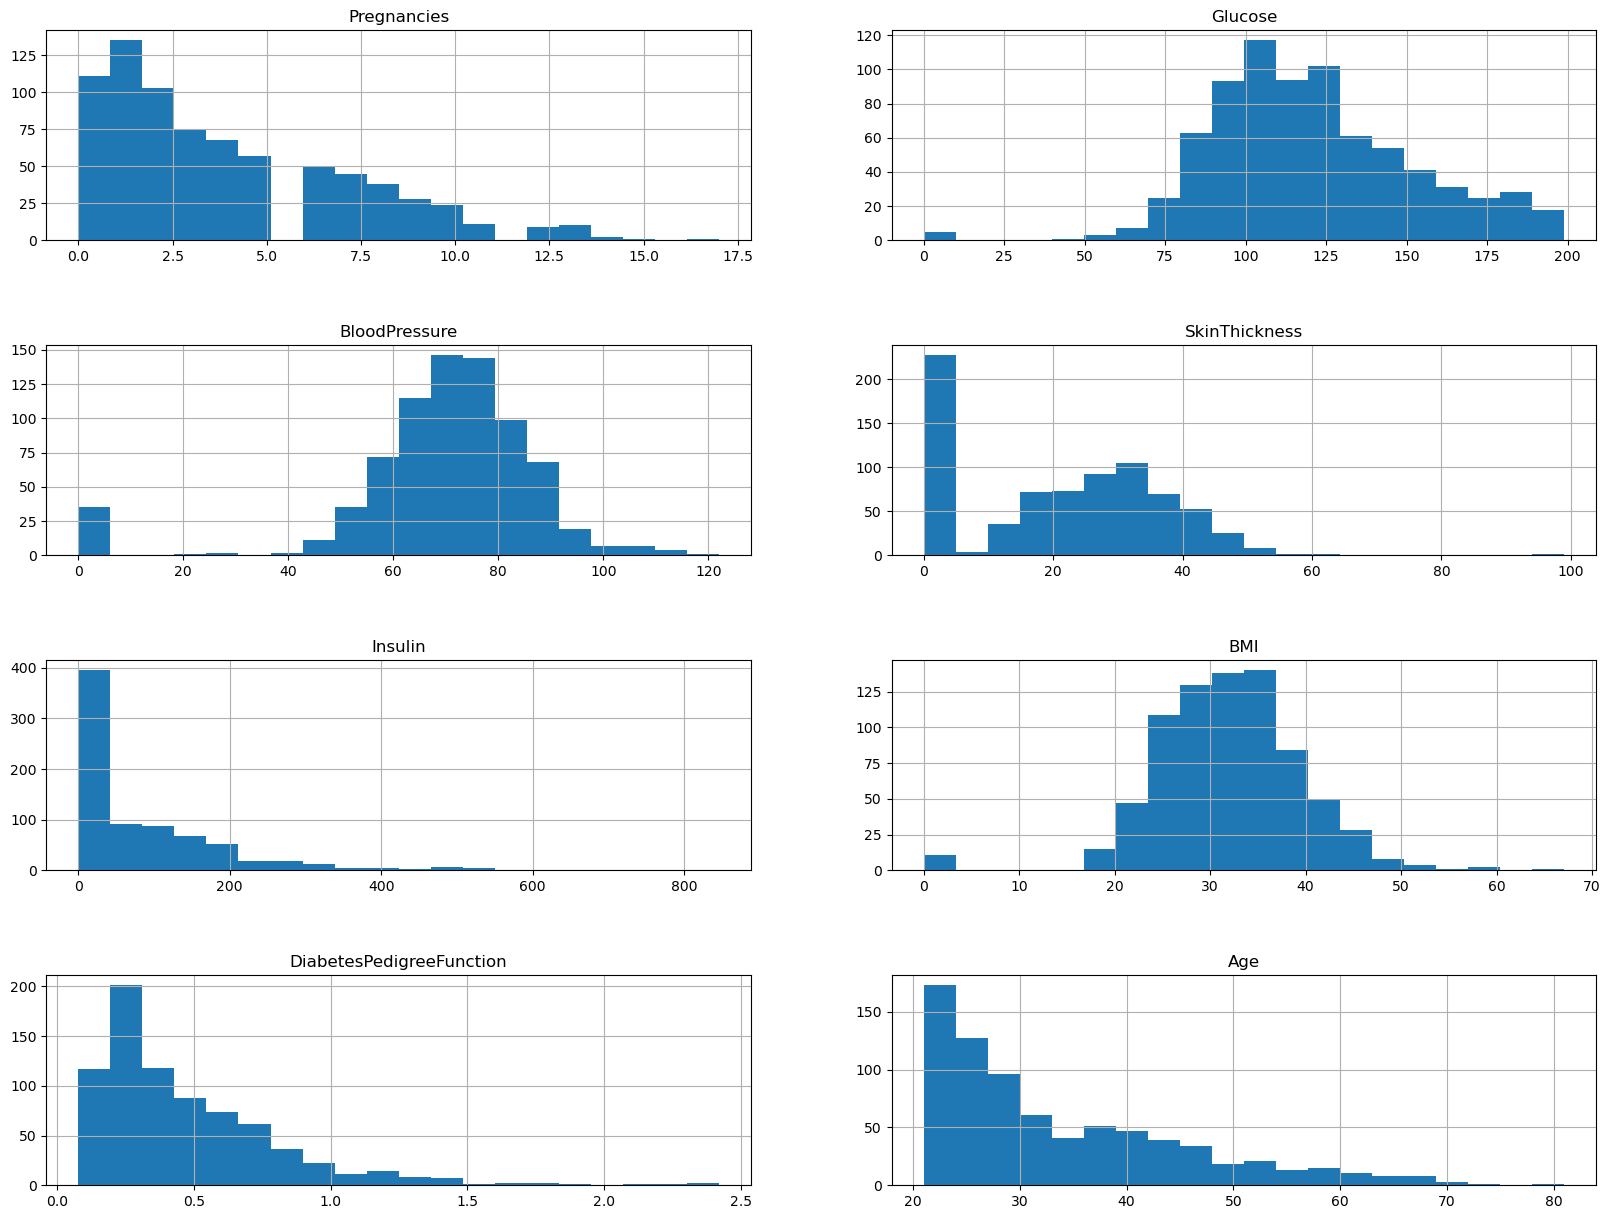

In [10]:
import itertools

col = dataset.columns[:8]
plt.figure(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length // 2) + (length % 2), 2, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    dataset[i].hist(bins=20)
    plt.title(i)

plt.show()

# Pair plot of dataset

In [ ]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

# Heatmap of Dataset

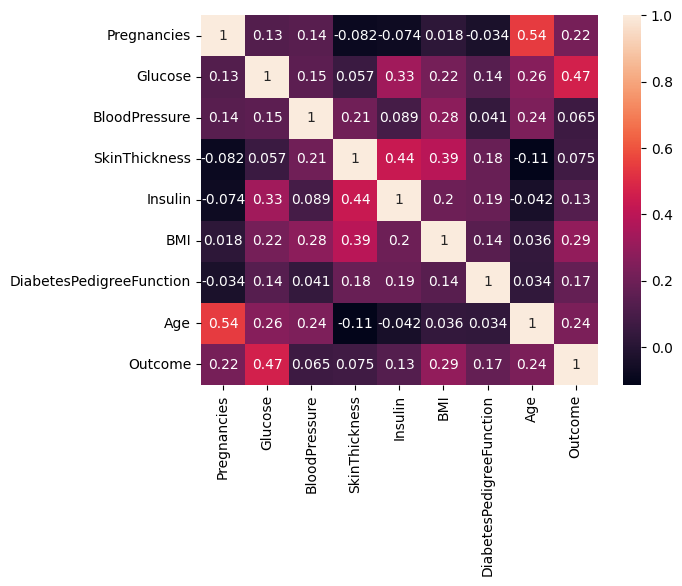

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Processing

In [ ]:
dataset_new = dataset

In [ ]:
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

In [ ]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#Replacing NaN with mean values

In [ ]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

# Statistical summary

In [ ]:
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


# Feature scalling using min max scaller

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset_new)

In [ ]:
dataset_scaled = pd.DataFrame(dataset_scaled)

# Selecting Features

In [ ]:
X = dataset_scaled.iloc[:,[1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

# Splitting X and Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'])

# Checking Dimensions

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
X_test shape: (154, 4)


# Data Modelling

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, Y_train)
LogisticRegression(random_state=42)

LogisticRegression(random_state=42)

# Predicting rhe model

In [ ]:
training_accuracy = lr.score(X_train, Y_train)
print("Training Accuracy of Logistic Regression:", training_accuracy)

Training Accuracy of Logistic Regression: 0.7801302931596091


In [ ]:
Y_pred_lr = lr.predict(X_test)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       100
         1.0       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [ ]:
from sklearn.metrics import f1_score
score_lr = round(accuracy_score(Y_test, Y_pred_lr)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print('Precision: %.3f' % precision_score(Y_pred_lr, Y_test))
print('Reacll: %.3f' % recall_score(Y_test, Y_pred_lr))
print('F1 Score: %.3f' % f1_score(Y_test, Y_pred_lr))

The accuracy score achieved using Logistic Regression is: 72.08 %
Precision: 0.500
Reacll: 0.500
F1 Score: 0.557


Confusion Matrix

In [ ]:
# prompt: Print confusion matrix from the given data after importing it from sklearn.matrics

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_lr)
print(cm)


[[84 16]
 [27 27]]


# Heatmap of CM

<Axes: >

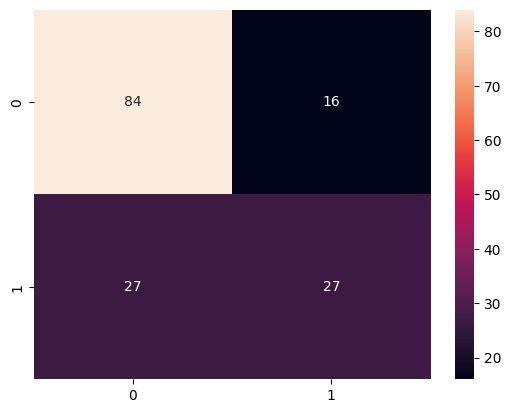

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True)

# Plotting a graph for n_neighbors


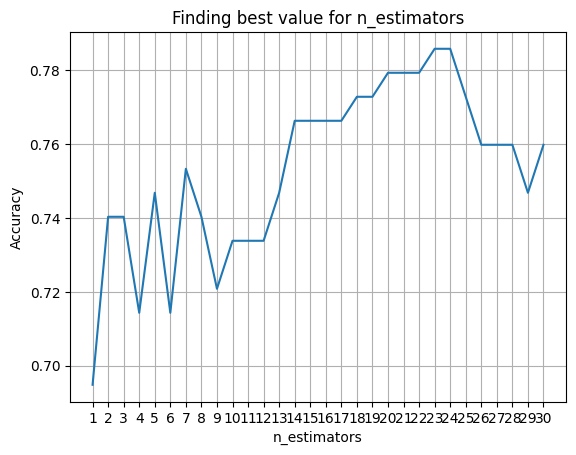

Highest value:  0.7857142857142857


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x=range(1,31)

for i in list(range(1, 31)):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(X_train, Y_train)
  prediction = knn_model.predict(X_test)
  acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, Y_test))])
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

# K nearest neighbors Algo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)

# predicting KNN model

In [ ]:
knn.fit(X_train, Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_test, Y_pred_knn)*100, 2)

In [ ]:
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print('Precision: %.3f' % precision_score(Y_test, Y_pred_knn))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_knn))
print('F1 score: %.3f' % f1_score(Y_test, Y_pred_knn))

The accuracy score achieved using KNN is: 78.57 %
Precision: 0.723
Recall: 0.630
F1 score: 0.673


In [ ]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



# CM of knn

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
print(cm)

[[87 13]
 [20 34]]


<Axes: >

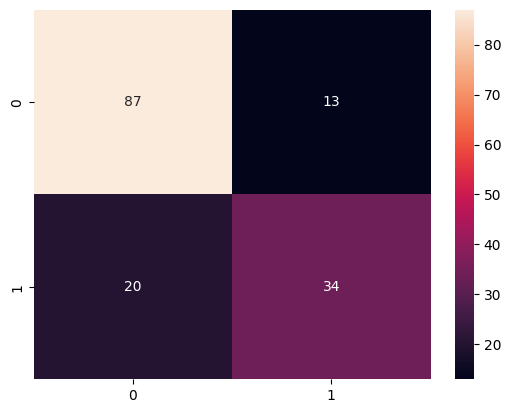

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True)

# SVC Algo

In [ ]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_train, Y_train)
Y_pred_svc_linear = svc_linear.predict(X_test)
score_svc_linear = round(accuracy_score(Y_test, Y_pred_svc_linear)*100,2)
print("The accuracy score Achieved using Linear SVC is: "+str(score_svc_linear)+" %")

The accuracy score Achieved using Linear SVC is: 73.38 %


In [ ]:
print('Precision: %.3f' % precision_score(Y_test, Y_pred_svc_linear))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_svc_linear))
print('F1 score: %.3f' % f1_score(Y_test, Y_pred_svc_linear))

Precision: 0.651
Recall: 0.519
F1 score: 0.577


In [ ]:
print(classification_report(Y_test, Y_pred_svc_linear))

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       100
         1.0       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



# Building SVC kernel = Polynomial

In [ ]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, Y_train)
Y_pred_svc_poly = svc_poly.predict(X_test)

In [ ]:
score_svc_poly = round(accuracy_score(Y_test, Y_pred_svc_poly)*100,2)
print("The accuracy score Achieved using Linear SVM is: "+str(score_svc_poly)+" %")

The accuracy score Achieved using Linear SVM is: 74.03 %


In [ ]:
print('Precision: %.3f' % precision_score(Y_test, Y_pred_svc_poly))
print('Recall: %.3f' % recall_score(Y_test, Y_pred_svc_poly))
print('F1 score: %.3f' % f1_score(Y_test, Y_pred_svc_poly))

Precision: 0.684
Recall: 0.481
F1 score: 0.565


In [ ]:
print(classification_report(Y_test, Y_pred_svc_poly))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81       100
         1.0       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



# Building the SVC kernel=Gaussian

In [ ]:
svc_gauss = SVC(kernel='rbf')
svc_gauss.fit(X_train, Y_train)
Y_pred_svc_gauss = svc_gauss.predict(X_test)

In [ ]:
score_svc_gauss = round(accuracy_score(Y_test, Y_pred_svc_gauss)*100,2)
print("The accuracy score Achieved using Gaussian SVM is: "+str(score_svc_gauss)+" %")

The accuracy score Achieved using Gaussian SVM is: 72.73 %


In [ ]:
print ('Precision: %.3f' % precision_score(Y_test, Y_pred_svc_gauss))
print ('Recall: %.3f' % recall_score(Y_test, Y_pred_svc_gauss))
print ('F1 score: %.3f' % f1_score(Y_test, Y_pred_svc_gauss))

Precision: 0.643
Recall: 0.500
F1 score: 0.563


In [ ]:
print(classification_report(Y_test, Y_pred_svc_gauss))

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       100
         1.0       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



# SVC kernel = Sigmoid

In [ ]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, Y_train)
Y_pred_svc_sigmoid = svc_sigmoid.predict(X_test)
score_svc_sigmoid = round(accuracy_score(Y_test, Y_pred_svc_sigmoid)*100,2)
print("The accuracy score Achieved using Sigmoid SVM is: "+str(score_svc_sigmoid)+" %")

The accuracy score Achieved using Sigmoid SVM is: 31.82 %


In [ ]:
print(classification_report(Y_test, Y_pred_svc_sigmoid))

              precision    recall  f1-score   support

         0.0       0.47      0.46      0.47       100
         1.0       0.05      0.06      0.05        54

    accuracy                           0.32       154
   macro avg       0.26      0.26      0.26       154
weighted avg       0.33      0.32      0.32       154



In [ ]:
accuracy = {'svc_polynomial' : score_svc_poly, 'svc_linear' : score_svc_linear, 'svc_gaussian' : score_svc_gauss, 'svc_sigmoid' : score_svc_sigmoid}

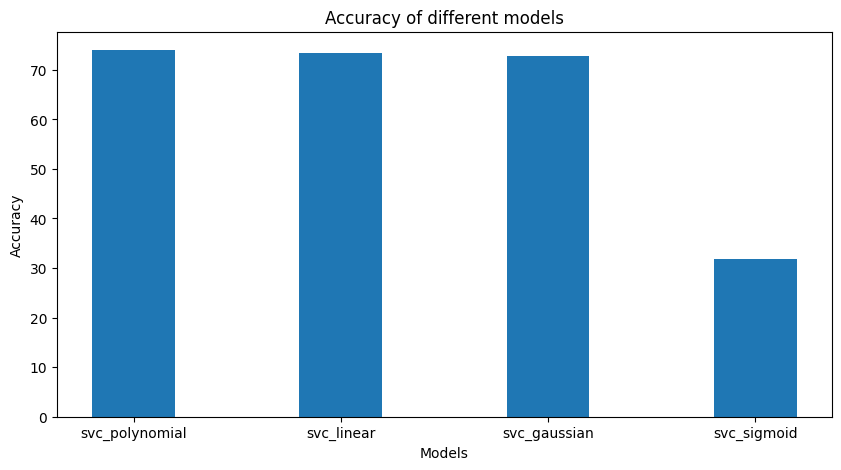

In [ ]:
model = list(accuracy.keys())
values = list(accuracy.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(model, values,width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.show()

# Random Forest Algo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_test, Y_pred_rf)*100,2)
print("The accuracy score Achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score Achieved using Random Forest is: 74.68 %


In [ ]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.82       100
         1.0       0.67      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



# Decision Tree Algo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_pred_dt = dt.predict(X_test)
score_dt = round(accuracy_score(Y_test, Y_pred_dt)*100,2)
print("The accuracy score Achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score Achieved using Decision Tree is: 68.18 %


# ***Graph for Different Algo***

In [ ]:
accuracy_scores = [score_lr, score_knn, score_rf, score_dt]
algorithms = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree']

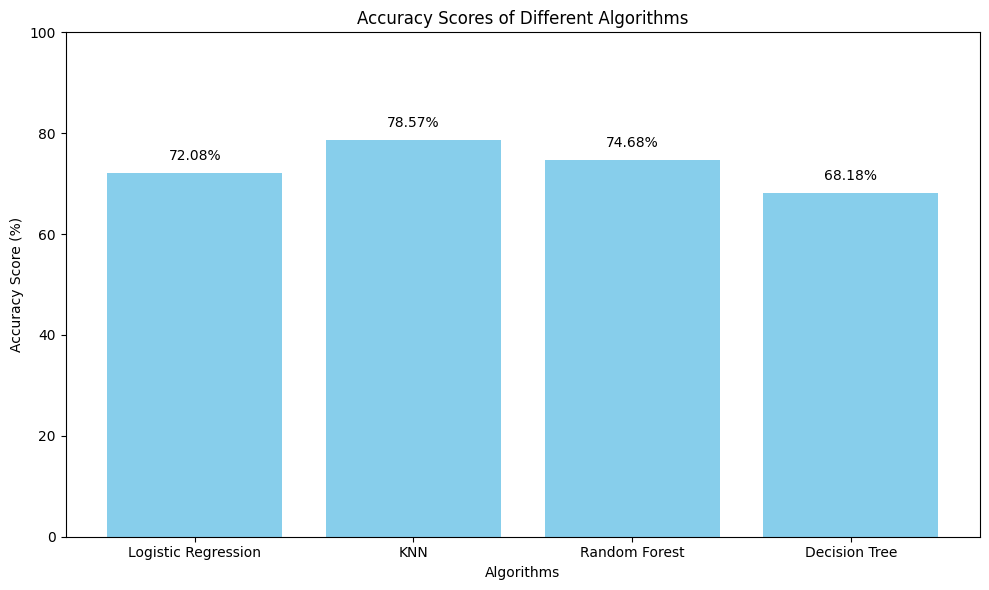

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score (%)')
plt.title('Accuracy Scores of Different Algorithms')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 2, f'{score}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Storing Model in pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(knn, open('Diabetesmodel.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('Diabetesmodel.pkl', 'rb'))

# Prediction By taking Input from user

In [ ]:
input_data1 = (137,138,43,33)
input_data1_as_numpy_array = np.asarray(input_data1)
input_reshape1 = input_data1_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_reshape1)
print(prediction)

[1.]


In [ ]:
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


In [ ]:
import pickle
import pandas as pd

# 1. We need a scaler that only knows about your 4 features
# Features used in your notebook: Glucose(1), Insulin(4), BMI(5), Age(7)
X_features = dataset_new.iloc[:, [1, 4, 5, 7]] 
scaler_4 = MinMaxScaler(feature_range=(0, 1))
scaler_4.fit(X_features)

# 2. Save the KNN model and this new 4-feature scaler
pickle.dump(knn, open('Diabetesmodel.pkl', 'wb'))
pickle.dump(scaler_4, open('scaler.pkl', 'wb'))

print("Success! Saved Diabetesmodel.pkl and scaler.pkl")